In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from tensorflow.keras.layers import Dense

In [6]:
df=pd.read_csv("Churn.csv")

## Overview of the data

In [23]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## Get the statistical summary of the data 

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Plot the correlation between the features

C:\Users\Hagar\AppData\Local\Temp\ipykernel_2432\2396709005.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


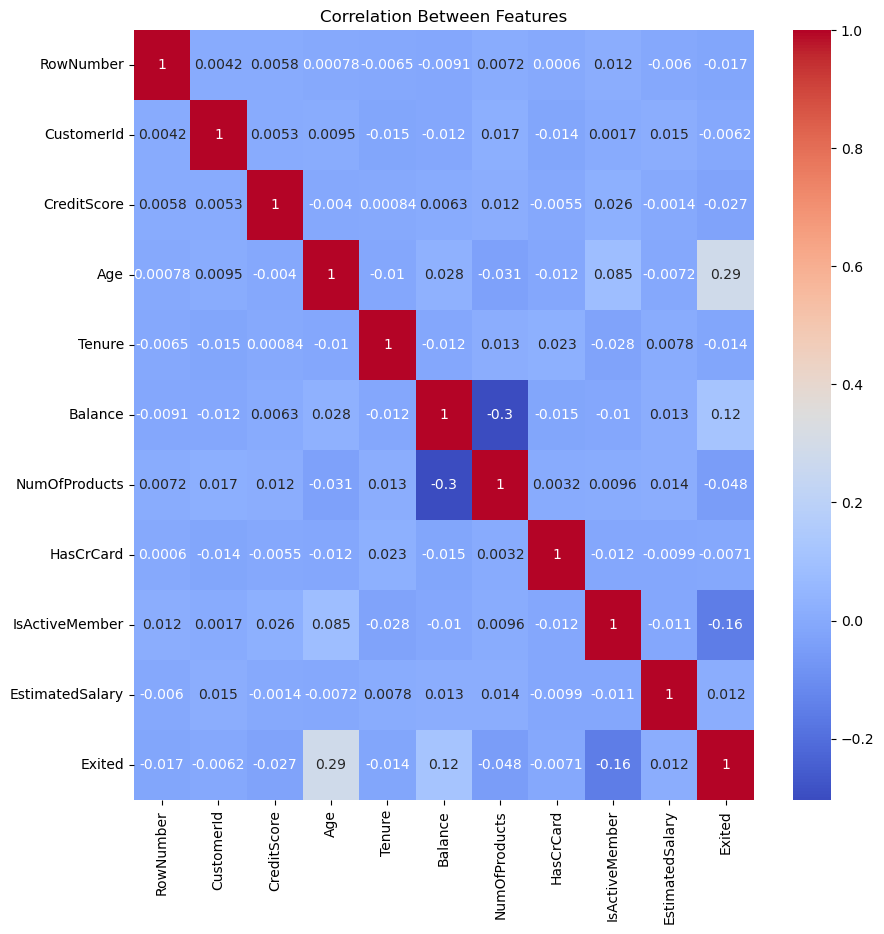

In [15]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Features')
plt.show()

## Plot the missing value of the data 

In [1]:
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt

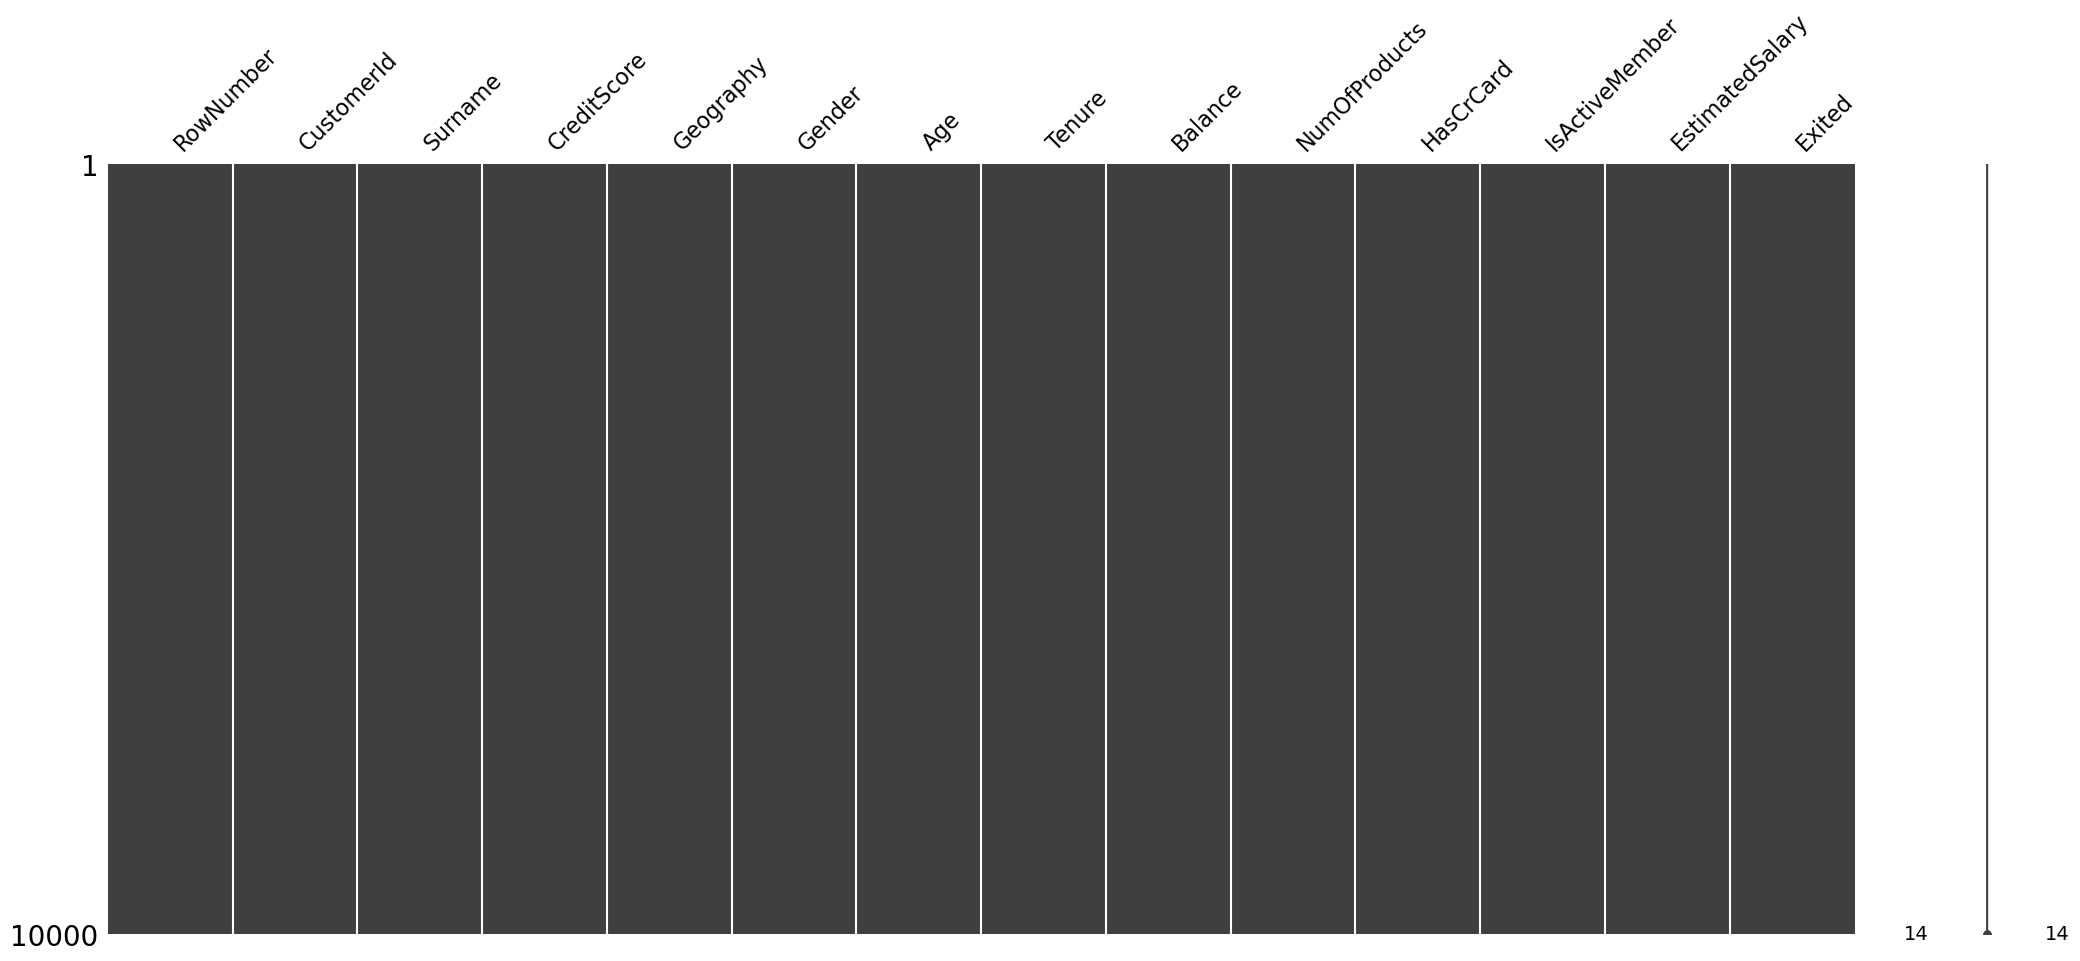

In [5]:
msno.matrix(df)
plt.show()

In [6]:
#No missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Check the duplicated value

In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [8]:
#no duplications

## Plot a pie chart to get the percentages of the exitpie charted and no exited

In [13]:
count = df['Exited'].value_counts()
count

0    7963
1    2037
Name: Exited, dtype: int64

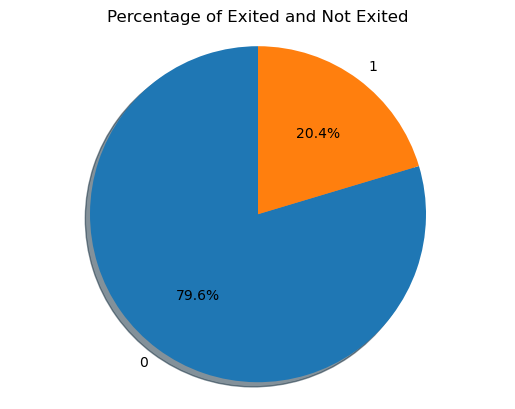

In [20]:
plt.pie(count, labels=count.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title('Percentage of Exited and Not Exited')
plt.show()

## Get the x and y 

In [8]:
y=df['Exited']
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender',"Geography",'Exited'], axis=1)

In [25]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [26]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## Using column transformer to transfrom using encoder and one hot encoder

In [ ]:
transformer = ColumnTransformer(
    transformers=[
        ('label_encoder', LabelEncoder(), ['col-name']),
        ('one_hot_encoder', OneHotEncoder(), ['col-name'])
    ]
)
#here there is no categorical data to transform

## Splitting the dataset into training and test set

In [9]:
X_train,X_test,y_train,y_test=X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Make a feature scaling using standard scaler


In [10]:
scaler = StandardScaler()
X_train_Standarded=scaler.fit_transform(X_train)
X_test_Standarded=scaler.fit_transform(X_test)

## Bulid the first ANN 

In [13]:
ANN = keras.Sequential([
    Dense(1000, input_shape=(8,), activation='relu'),
    Dense(3000,activation='relu'),
    Dense(1000,activation='relu'),
    Dense(10, activation='sigmoid'),
])


ANN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ANN.fit(X_train_Standarded, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 21s 77ms/step - loss: 0.4377 - accuracy: 0.8239
Epoch 2/100
250/250 [==============================] - 20s 79ms/step - loss: 0.3708 - accuracy: 0.8489
Epoch 3/100
250/250 [==============================] - 19s 78ms/step - loss: 0.3622 - accuracy: 0.8530
Epoch 4/100
250/250 [==============================] - 20s 78ms/step - loss: 0.3612 - accuracy: 0.8526
Epoch 5/100
250/250 [==============================] - 20s 79ms/step - loss: 0.3546 - accuracy: 0.8547
Epoch 6/100
250/250 [==============================] - 20s 79ms/step - loss: 0.3524 - accuracy: 0.8555
Epoch 7/100
250/250 [==============================] - 19s 78ms/step - loss: 0.3509 - accuracy: 0.8577
Epoch 8/100
250/250 [==============================] - 19s 78ms/step - loss: 0.3479 - accuracy: 0.8569
Epoch 9/100
250/250 [==============================] - 20s 79ms/step - loss: 0.3445 - accuracy: 0.8581
Epoch 10/100
250/250 [==============================] - 20s 78ms/step - l

## Get the predictions of the model 

In [14]:
ANN.evaluate(X_test_Standarded, y_test)

63/63 [==============================] - 1s 6ms/step - loss: 1.8855 - accuracy: 0.8025


[1.8854762315750122, 0.8025000095367432]

## Get the confusion matrix 

63/63 [==============================] - 0s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

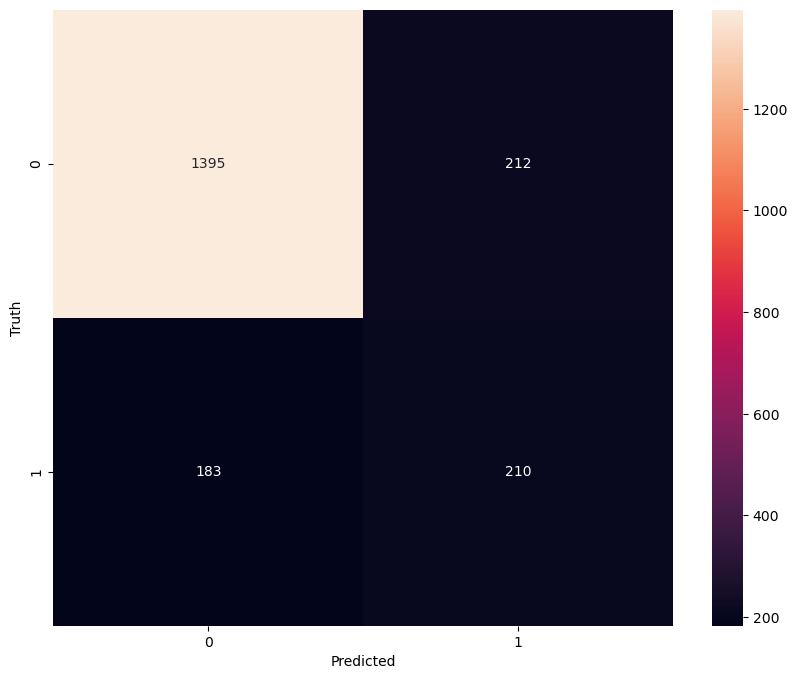

In [21]:
y_predicted = ANN.predict(X_test_Standarded)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.figure(figsize = (10,8))
plt.xlabel('Predicted')
plt.ylabel('Truth')